In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded = files.upload() 
import io 
train = pd.read_csv(io.BytesIO(uploaded['train.csv']), sep=",")

Saving train.csv to train (3).csv


# 데이터 정보 확인

In [ ]:
# 데이터 프레임 확인
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


총 데이터 갯수 : 891개
- Age, Cabin, Embarked 컬럼에 결측값 존재
- Age -> 평균으로 결측값 대체
- Cabin -> 결측값이 너무 많아, 무의미한 변수로 판단. 제거.
- Embarked -> Survived, Pclass값을 활용하여 결측값 대체

y값 : Survived

x값 : 나머지 11개 컬럼들



In [ ]:
train[train["Age"].isnull()]  # "Age" 컬럼의 결측치 있는 행만 불러와서 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
# 결측치 있는 행인
# "Age", "Cabin", "Embarked" 행별로 결측값을 평균으로 대체
train = train.fillna(train.mean())
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [ ]:
# 기초 통계량
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Cabin 컬럼 삭제
del train["Cabin"]

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
train[train["Embarked"].isnull()]
# 61, 829번째 데이터의 Embarked 컬럼의 결측값이 있는 것 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


# 결측값 대체

In [ ]:
# Embarked 컬럼의 결측값을 채우기 위해
# 나머지 column들로 상관계수 행렬을 출력해보자
train2 = train.copy()
del train2["PassengerId"]
display(train2)

corr_matrix = train2.corr()
corr_matrix["Survived"].sort_values(ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Pclass     -0.338481
Name: Survived, dtype: float64

In [ ]:
# 상관계수 행렬을 보았을 때
# Survived와의 상관계수가 제일 큰 컬럼이 Pclass이다.
# 위의 결측값 데이터 2개에서
# Survived, Pclass 값 둘 다 1이었으니
# Survived=1, Pclass=1인 데이터들만 뽑은 후, 제일 많이 나온 Embarked를 찾아
# Embarked 결측값을 대체한다.

In [ ]:
train3 = train[(train["Survived"] == 1) & (train["Pclass"] == 1)]
train3
# 우선 Survived=1, Pclass=1인 데이터들 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S


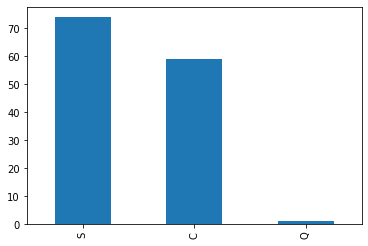

In [ ]:
train3["Embarked"].value_counts().plot(kind="bar")
plt.show()

In [ ]:
# Survived=1, Pclass=1인 데이터들 중에서
# Embarked가 S인 데이터가 제일 많다.
# 따라서 S로 결측값 대체하자.
train = train.fillna("S")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
train.info()
# 모든 컬럼의 결측값 없는 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# 새로운 변수 추가

In [ ]:
# Family = SibSp + Parch + 1(자기자신) 변수 추가
train["Family"] = train["SibSp"] + train["Parch"] + 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


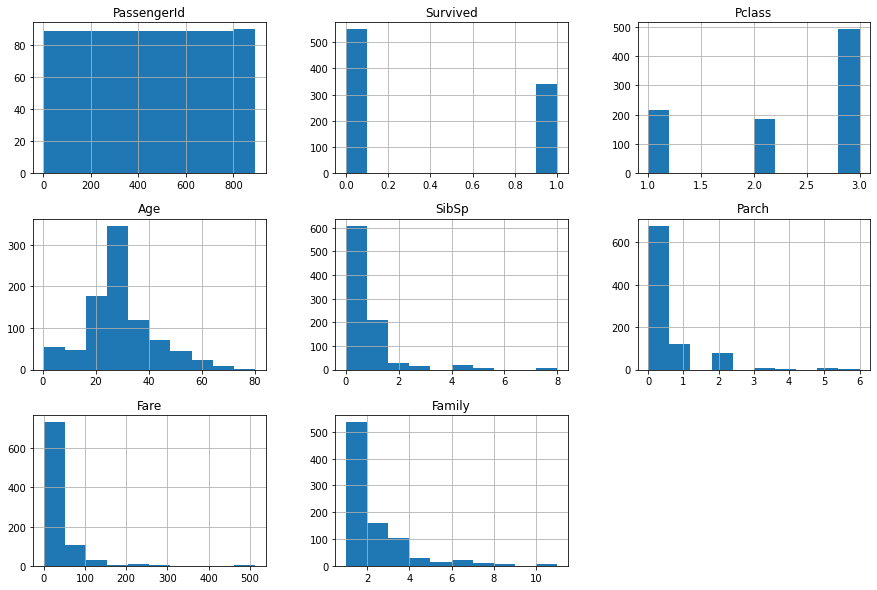

In [ ]:
train.hist(bins=10, figsize=(15,10))
plt.show()

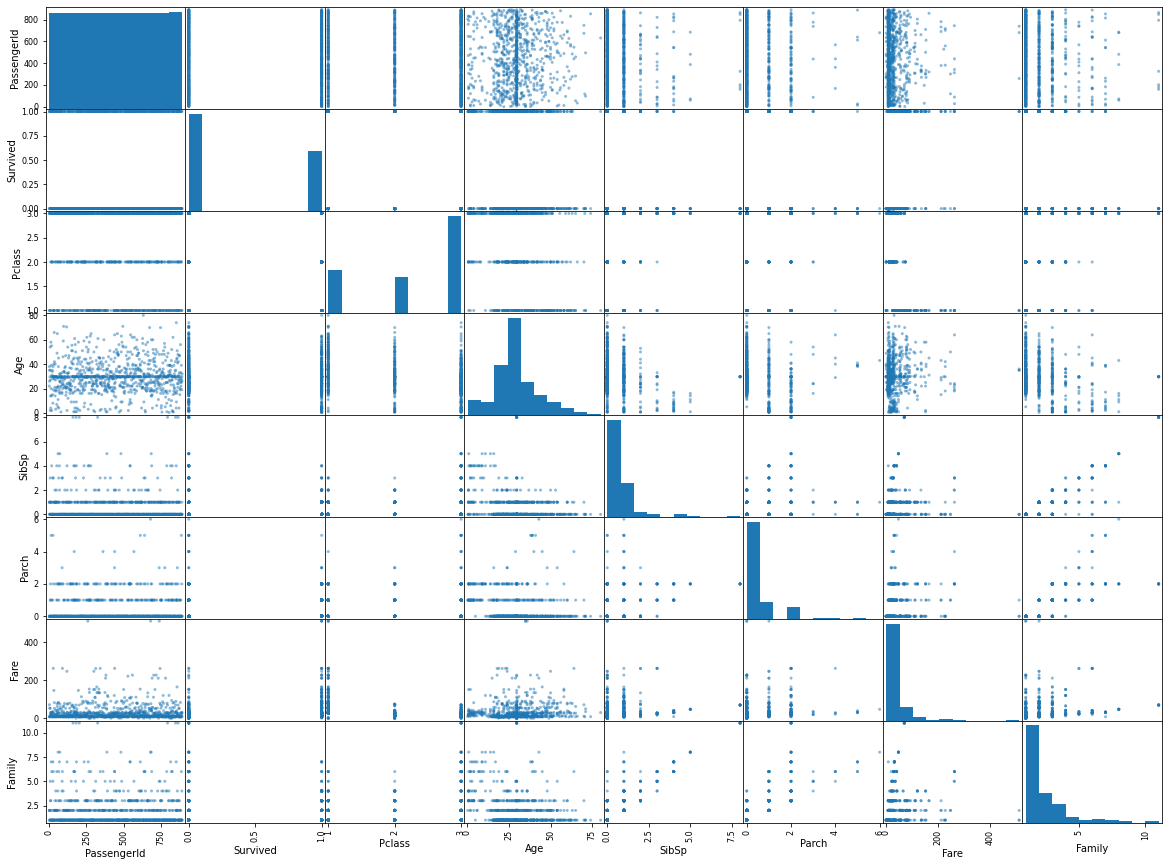

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(train, figsize=(20,15))
plt.show()

# 범주형 자료 One-hot Encoding


Pclass, Embarked 값이 범주형이니까, One-Hot-Encoding으로 수치형으로 변경
- 여기서 범주형이란 숫자의 의미가 없는 형태!


In [ ]:
train_Pcl = train[["Pclass"]]


# Pclass 컬럼 One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()

train_Pcl_one_hot = encoder1.fit_transform(train_Pcl)
train_Pcl_one_hot[:10]

<10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
train_Pcl_one_hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
train_Emb = train[["Embarked"]]

# Embarked 컬럼 One-hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder()
train_Emb_one_hot = encoder2.fit_transform(train_Emb)
train_Emb_one_hot[:10]

<10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
train_Emb_one_hot.toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
# one-hot encoding된 Pclass array를 데이터 프레임으로 변환 후
# train 데이터셋에 합치자
Pcl_df = pd.DataFrame(train_Pcl_one_hot.toarray(), columns=["Class1","Class2","Class3"])
Pcl_df

,Class1,Class2,Class3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [ ]:
# one-hot encoding된 Embarked array를 데이터 프레임으로 변환 후
# train 데이터셋에 합치자
Emb_df = pd.DataFrame(train_Emb_one_hot.toarray(), columns=["Emb_C", "Emb_Q", "Emb_S"])
Emb_df

,Emb_C,Emb_Q,Emb_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [ ]:
train = train.drop(columns=["Pclass", "Embarked", "Name", "Ticket"])
train

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Family
0,1,0,male,22.000000,1,0,7.2500,2
1,2,1,female,38.000000,1,0,71.2833,2
2,3,1,female,26.000000,0,0,7.9250,1
3,4,1,female,35.000000,1,0,53.1000,2
4,5,0,male,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,male,27.000000,0,0,13.0000,1
887,888,1,female,19.000000,0,0,30.0000,1
888,889,0,female,29.699118,1,2,23.4500,4
889,890,1,male,26.000000,0,0,30.0000,1


In [ ]:
train = pd.concat([train, Pcl_df, Emb_df], axis=1)
train

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Family,Class1,Class2,Class3,Emb_C,Emb_Q,Emb_S
0,1,0,male,22.000000,1,0,7.2500,2,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,female,38.000000,1,0,71.2833,2,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,female,26.000000,0,0,7.9250,1,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,female,35.000000,1,0,53.1000,2,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,male,35.000000,0,0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,male,27.000000,0,0,13.0000,1,0.0,1.0,0.0,0.0,0.0,1.0
887,888,1,female,19.000000,0,0,30.0000,1,1.0,0.0,0.0,0.0,0.0,1.0
888,889,0,female,29.699118,1,2,23.4500,4,0.0,0.0,1.0,0.0,0.0,1.0
889,890,1,male,26.000000,0,0,30.0000,1,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family,Class1,Class2,Class3,Emb_C,Emb_Q,Emb_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,1.904602,0.242424,0.206510,0.551066,0.188552,0.086420,0.725028
std,257.353842,0.486592,13.002015,1.102743,0.806057,49.693429,1.613459,0.428790,0.405028,0.497665,0.391372,0.281141,0.446751
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family,Class1,Class2,Class3,Emb_C,Emb_Q,Emb_S
PassengerId,1.000000,-0.005007,0.033207,-0.057527,-0.001652,0.012658,-0.040143,0.034303,-0.000086,-0.029486,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.016639,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683
Age,0.033207,-0.069809,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.319916,0.006589,-0.281004,0.032024,-0.013855,-0.019336
SibSp,-0.057527,-0.035322,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,0.091566,0.159651,0.216225,1.000000,0.217138,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184
Family,-0.040143,0.016639,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.046114,-0.038594,0.071142,-0.046215,-0.058592,0.077359
Class1,0.034303,0.285904,0.319916,-0.054582,-0.017633,0.591711,-0.046114,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921
Class2,-0.000086,0.093349,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980
Class3,-0.029486,-0.322308,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104


In [ ]:
# Class1, Fare 간의 상관관계가 높아보인다.
# Class3, Fare 간의 상관관계가 높아보인다.

# 가격과 좌석 클래스의 관계는 상관관계가 높다.

In [ ]:
# 이 데이터를 분류하는 것이 목적이기 때문에,
# 특성조합은 이용하지 않도록 한다.

In [ ]:
# 성별을 수치형 데이터로 변환해보자.
# female : 0, male : 1
train["Sex"].replace(to_replace=dict(female=0, male=1), inplace=True)
train

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Family,Class1,Class2,Class3,Emb_C,Emb_Q,Emb_S
0,1,0,1,22.000000,1,0,7.2500,2,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,0,38.000000,1,0,71.2833,2,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,0,26.000000,0,0,7.9250,1,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,0,35.000000,1,0,53.1000,2,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,1,35.000000,0,0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,27.000000,0,0,13.0000,1,0.0,1.0,0.0,0.0,0.0,1.0
887,888,1,0,19.000000,0,0,30.0000,1,1.0,0.0,0.0,0.0,0.0,1.0
888,889,0,0,29.699118,1,2,23.4500,4,0.0,0.0,1.0,0.0,0.0,1.0
889,890,1,1,26.000000,0,0,30.0000,1,1.0,0.0,0.0,1.0,0.0,0.0


# 훈련 / 테스트 데이터로 나누기

In [ ]:
X_train_columns = train.columns[2:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[X_train_columns], train["Survived"], random_state=42)

In [ ]:
print('X_train의 크기 : {}'.format(X_train.shape))
print('y_train의 크기 : {}'.format(y_train.shape))

X_train의 크기 : (668, 12)
y_train의 크기 : (668,)


In [ ]:
print('X_test 크기 : {}'.format(X_test.shape))
print('y_test 크기 : {}'.format(y_test.shape))

X_test 크기 : (223, 12)
y_test 크기 : (223,)


# 로지스틱 회귀 모델
- 선형 이진 분류

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train = pd.DataFrame(X_train)
logreg10 = LogisticRegression().fit(X_train, y_train)

# 점수 확인
print("훈련 세트 점수 : {:.3f}".format(logreg10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg10.score(X_test, y_test)))

훈련 세트 점수 : 0.807
테스트 세트 점수 : 0.803


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg10000 = LogisticRegression(C=10000).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg10000.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg10000.score(X_test, y_test)))

훈련 세트 점수 : 0.807
테스트 세트 점수 : 0.803


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg01 = LogisticRegression(C=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg01.score(X_test, y_test)))

훈련 세트 점수 : 0.814
테스트 세트 점수 : 0.807


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg0001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg0001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg0001.score(X_test, y_test)))

훈련 세트 점수 : 0.677
테스트 세트 점수 : 0.677


로지스틱 회귀모델의 hyper parameter인 C값을 10, 10000, 0.1, 0.001로 조절해가면서 테스트 해봤다.

제일 점수가 높은 모델은 C=0.1일 때이다.



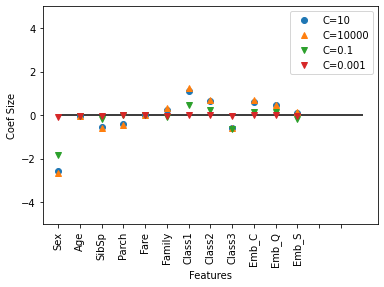

In [ ]:
# 각 로지스틱 회귀모델별로
# 각 변수별 기울기를 시각화
plt.plot(logreg10.coef_.T, 'o', label="C=10")
plt.plot(logreg10000.coef_.T, '^', label="C=10000")
plt.plot(logreg01.coef_.T, 'v', label="C=0.1")
plt.plot(logreg0001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(train[2:].shape[1]), X_train_columns, rotation=90)
plt.hlines(0, 0, train[2:].shape[1])
plt.ylim(-5, 5)
plt.xlabel("Features")
plt.ylabel("Coef Size")
plt.legend()
plt.show()

# SVC 모델

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.68
테스트 세트 정확도: 0.66


In [ ]:
# 위에서 scaling을 하지 않아도 된다고 판단을 해서
# 바로 SVC 모델로 훈련시켜보았는데
# 훈련 데이터셋과 테스트 데이터셋의 정확도가 둘 다 낮다.
# 따라서 과소적합된 것을 확인 가능

# SVM은 매개변수 설정과 데이터 스케일에 매우 민감한 모델이므로
# scaling을 해준 후, 다시 훈련시켜보자.

In [ ]:
# 피쳐 스케일링
# StandardScaler를 사용해보자.

train4 = train.copy()
from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
train4_stdsclr = stdsclr.fit_transform(train4)
train4_stdsclr

array([[-1.73010796, -0.78927234,  0.73769513, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.72622007,  1.2669898 , -1.35557354, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-1.72233219,  1.2669898 , -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 1.72233219, -0.78927234, -1.35557354, ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 1.72622007,  1.2669898 ,  0.73769513, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 1.73010796, -0.78927234,  0.73769513, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [ ]:
# 다시 훈련 / 테스트 데이터로 쪼개보자.
X_train_columns = train.columns[2:]
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(train4[X_train_columns], train4["Survived"], random_state=42)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train4, y_train4)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train4, y_train4)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test4, y_test4)))

훈련 세트 정확도: 0.68
테스트 세트 정확도: 0.66


In [ ]:
# 이 데이터는
# scaling을 하기 전과 후의 SVC모델에 훈련시킨 결과가 동일하다.
# 이 모델을 분석하기에는 SVC 모델 자체가 적합하지 않다.

# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.957
테스트 세트 정확도 : 0.753


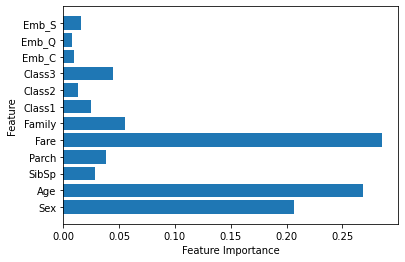

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = train[X_train_columns].shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train[X_train_columns])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)
plt.show()

In [ ]:
# 특성 중요도를 보니
# Fare, Age, Sex 변수가 중요하다고 나왔다.

In [ ]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.785


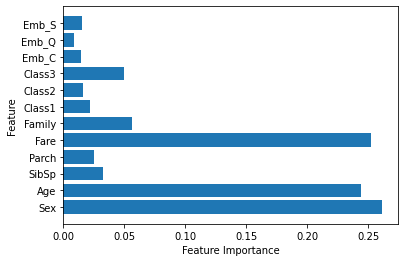

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = train[X_train_columns].shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train[X_train_columns])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(forest)
plt.show()

In [ ]:
# 특성 중요도를 보니
# 나무의 갯수가 5개일 모델과 다르게
# Sex 피쳐가 제일 중요도가 높게 나왔다.

In [ ]:
# 나무의 갯수가 5개, 100개인 랜덤 포레스트 모델 2개 다
# 과대적합된 것을 확인가능하다.

In [ ]:
# tree계열 모델에서의 과대적합은 피할 수 없다.
# 과대적합을 피하기 위해
# 사전가지치기를 해보자.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=42, max_depth=3)
forest.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.784
테스트 세트 정확도 : 0.771


In [ ]:
# 과대적합은 피했지만 전체적으로 점수가 낮아졌다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=5)
forest.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.865
테스트 세트 정확도 : 0.816


In [ ]:
# 최종 랜덤포레스트.

# 그리드 서치

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# GridSearch
param_grid = [
              {"n_estimators" : [5, 100, 138, 245, 380]},
              
              {"bootstrap" : [False],
               "n_estimators" : [5, 100, 138, 245, 380]}
]

# CrossValidation
# 8-FOLD
grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=8,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# 최고의 파라미터 조합보기
grid_search.best_params_

{'n_estimators': 100}

In [ ]:
# 최고의 파라미터를 이용한 모델 가져오기
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
res = grid_search.cv_results_  # Cross Validation 결과 목록 가져오기
# res
for mean_score, params in zip(res["mean_test_score"], res["params"]):
  print(mean_score.mean(), params)

0.7634645725760183 {'n_estimators': 5}
0.7919355995410212 {'n_estimators': 100}
0.7860011474469306 {'n_estimators': 138}
0.7785248135398738 {'n_estimators': 245}
0.7814830751577739 {'n_estimators': 380}
0.7724827882960413 {'bootstrap': False, 'n_estimators': 5}
0.7799949799196788 {'bootstrap': False, 'n_estimators': 100}
0.7784530981067126 {'bootstrap': False, 'n_estimators': 138}
0.7799949799196788 {'bootstrap': False, 'n_estimators': 245}
0.7799949799196788 {'bootstrap': False, 'n_estimators': 380}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.785


In [ ]:
# 최고 점수 : 78.5%

In [ ]:
# 고려해야 할 추가 사항

In [ ]:
train[train["Fare"] == 0]
# 무임승차가 있었다..

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Family,Class1,Class2,Class3,Emb_C,Emb_Q,Emb_S
179,180,0,1,36.000000,0,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0
263,264,0,1,40.000000,0,0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
271,272,1,1,25.000000,0,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0
277,278,0,1,29.699118,0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0
302,303,0,1,19.000000,0,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0
413,414,0,1,29.699118,0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0
466,467,0,1,29.699118,0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0
481,482,0,1,29.699118,0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,1.0
597,598,0,1,49.000000,0,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0
633,634,0,1,29.699118,0,0,0.0,1,1.0,0.0,0.0,0.0,0.0,1.0
